In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm, trange
tqdm.pandas()

sns.set(style="white")

D:\Users\Ritvik\Anaconda3\envs\ailab\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
data = pd.read_csv('data_cleaned_v2.csv')
print(data.shape)
data.head()

(2100595, 8)


,clean_text,positive,identity_hate,insult,obscene,severe_toxic,threat,toxic
0,cool like want mother read really great idea,1,0,0,0,0,0,0
1,thank make life lot anxiety inducing let way,1,0,0,0,0,0,0
2,urgent design problem kudos taking impressive,1,0,0,0,0,0,0
3,able install site releasing,1,0,0,0,0,0,0
4,haha guy bunch loser,0,0,1,0,0,0,1


In [3]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
print(data.shape)

(2094039, 8)


In [4]:
labels= ['positive', 'identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf=True)

vects = vectorizer.fit_transform(data['clean_text'])
target = data[labels].values

In [6]:
print('X shape', vects.shape)
print('Y shape', target.shape)

X shape (2094039, 404036)
Y shape (2094039, 7)


In [7]:
from utils.ml import train_model_one_vs_rest

Using TensorFlow backend.


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB


Mean roauc 0.8167 +- 0.003
Mean f1 0.8627 +- 0.001
Mean accuracy 0.9335 +- 0.0005


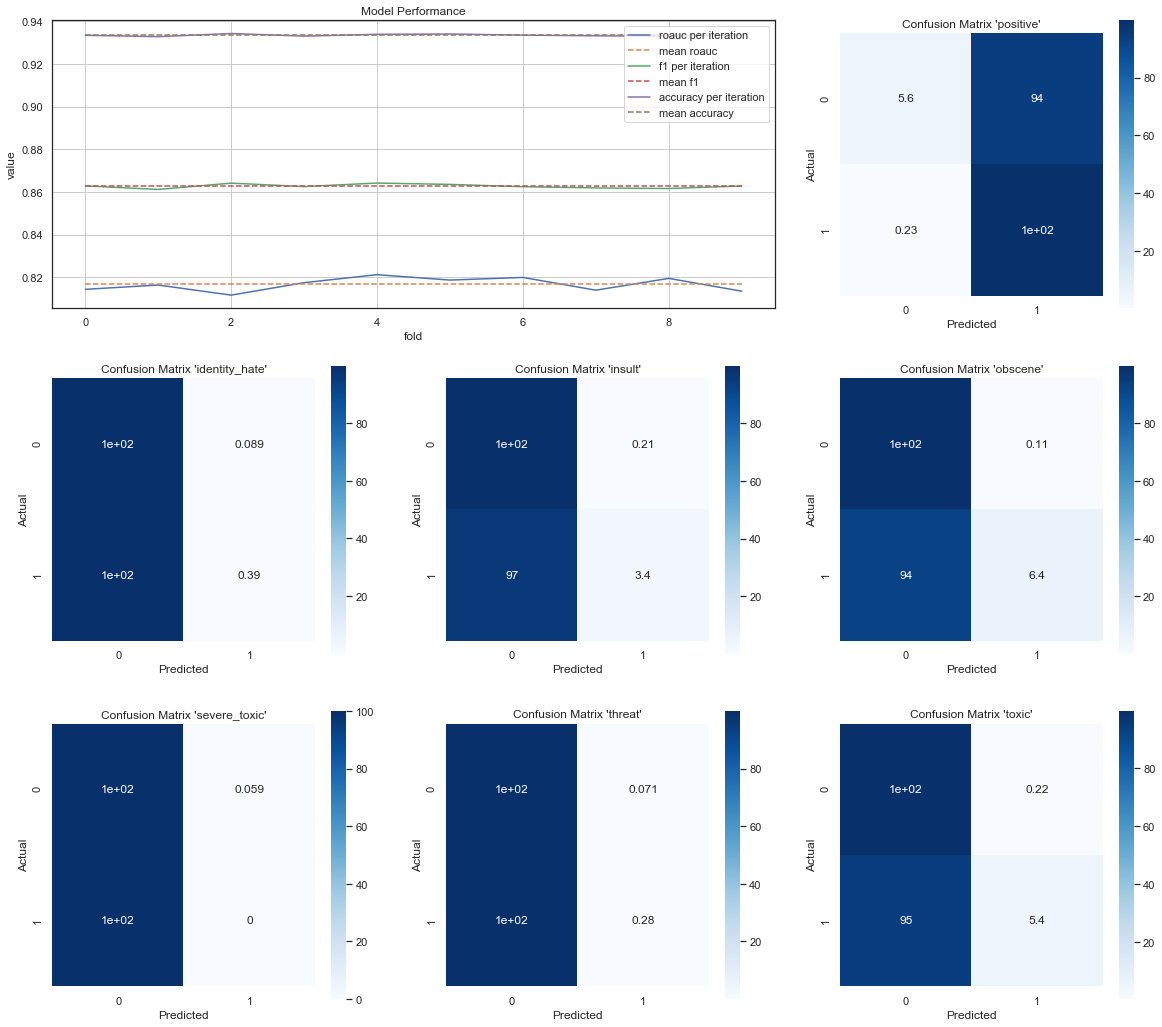

In [9]:
model = MultinomialNB()
mnb_performance, mnb_cm, mnb_model = train_model_one_vs_rest(model, vects, target, labels)
print('Mean roauc', round(np.mean(mnb_performance['roauc']), 4), '+-', round(np.std(mnb_performance['roauc']), 4))
print('Mean f1', round(np.mean(mnb_performance['f1']), 4), '+-', round(np.std(mnb_performance['f1']), 4))
print('Mean accuracy', round(np.mean(mnb_performance['accuracy']), 4), '+-', round(np.std(mnb_performance['accuracy']), 4))


Mean roauc 0.9717 +- 0.0008
Mean f1 0.9046 +- 0.0006
Mean accuracy 0.8687 +- 0.0008


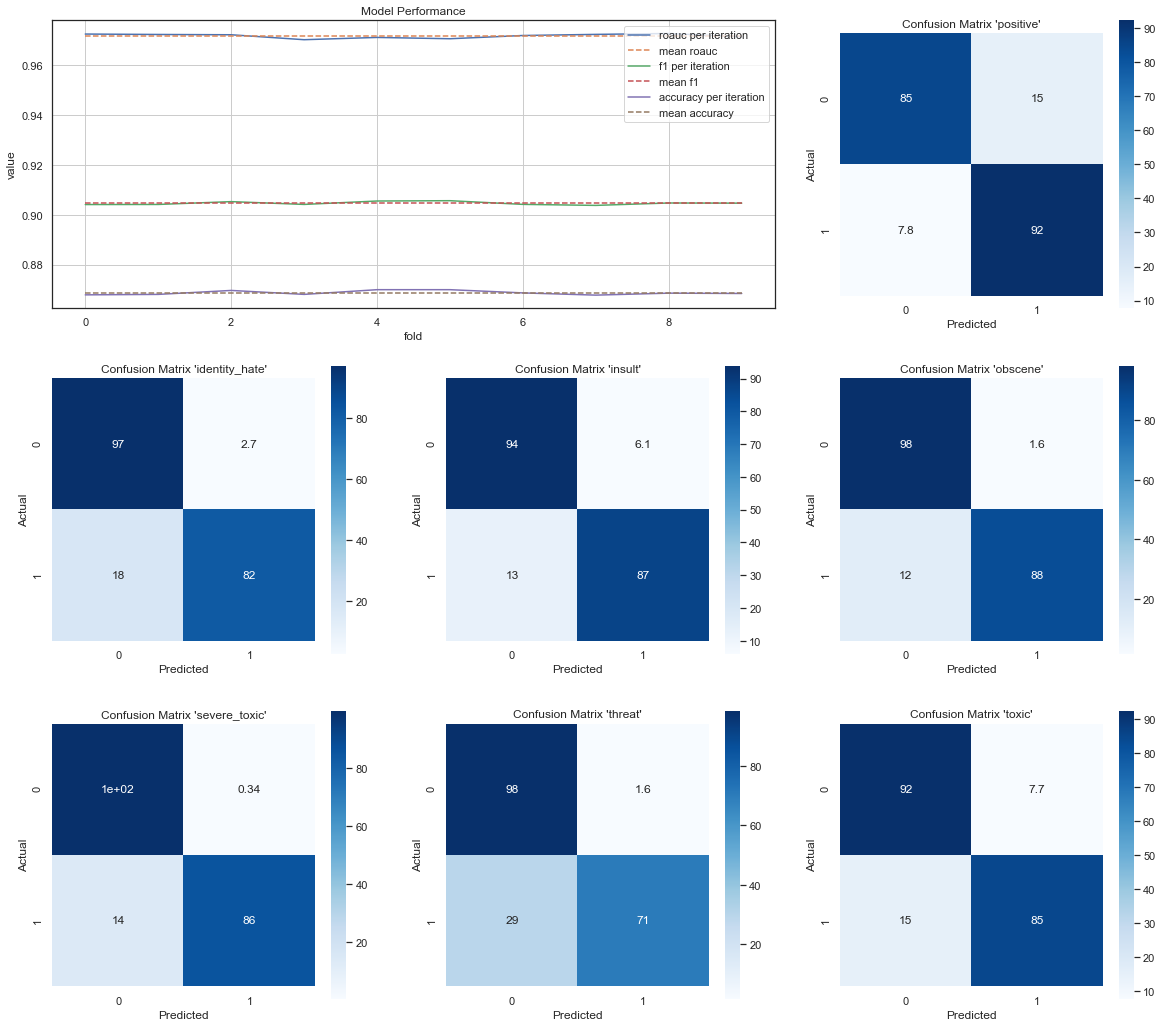

In [10]:
model = LogisticRegression(class_weight='balanced', random_state=19, max_iter=1_00_000)
lr_performance, lr_cm, lr_model = train_model_one_vs_rest(model, vects, target, labels)
print('Mean roauc', round(np.mean(lr_performance['roauc']), 4), '+-', round(np.std(lr_performance['roauc']), 4))
print('Mean f1', round(np.mean(lr_performance['f1']), 4), '+-', round(np.std(lr_performance['f1']), 4))
print('Mean accuracy', round(np.mean(lr_performance['accuracy']), 4), '+-', round(np.std(lr_performance['accuracy']), 4))

In [11]:
import pickle

In [12]:
pickle.dump(vectorizer, open('Vectorizer-V2.pkl', 'wb'))
pickle.dump(lr_model, open('LR-OneVsRest-V2.pkl', 'wb'))